In [3]:
import sys
from os import path

sys.path.insert(0, "../../")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle
import pandas as pd
#from pandas_profiling import ProfileReport


In [5]:
TS = np.genfromtxt('../../CUP/ML-CUP19-TR.csv',delimiter=',')

<p>1765 samples, 22 features.</p>
<p>Le ultime due colonne sono il target.</p>
<p>La prima colonna è l'id del pattern.</p>

In [20]:
len(TS)

1765

In [21]:
type(TS)

numpy.ndarray

In [22]:
X = TS[:,1:-2] #escludo il target e l'id

In [23]:
X.shape

(1765, 20)

In [24]:
df = pd.DataFrame(X, columns=list('ABCDEFGHILMNOPQRSTUV'))

In [17]:
(df["A"]-df["B"]).describe()

count    1765.000000
mean       -0.030508
std         1.923158
min        -3.576284
25%        -2.037243
50%         0.175846
75%         1.779581
max         3.211358
dtype: float64

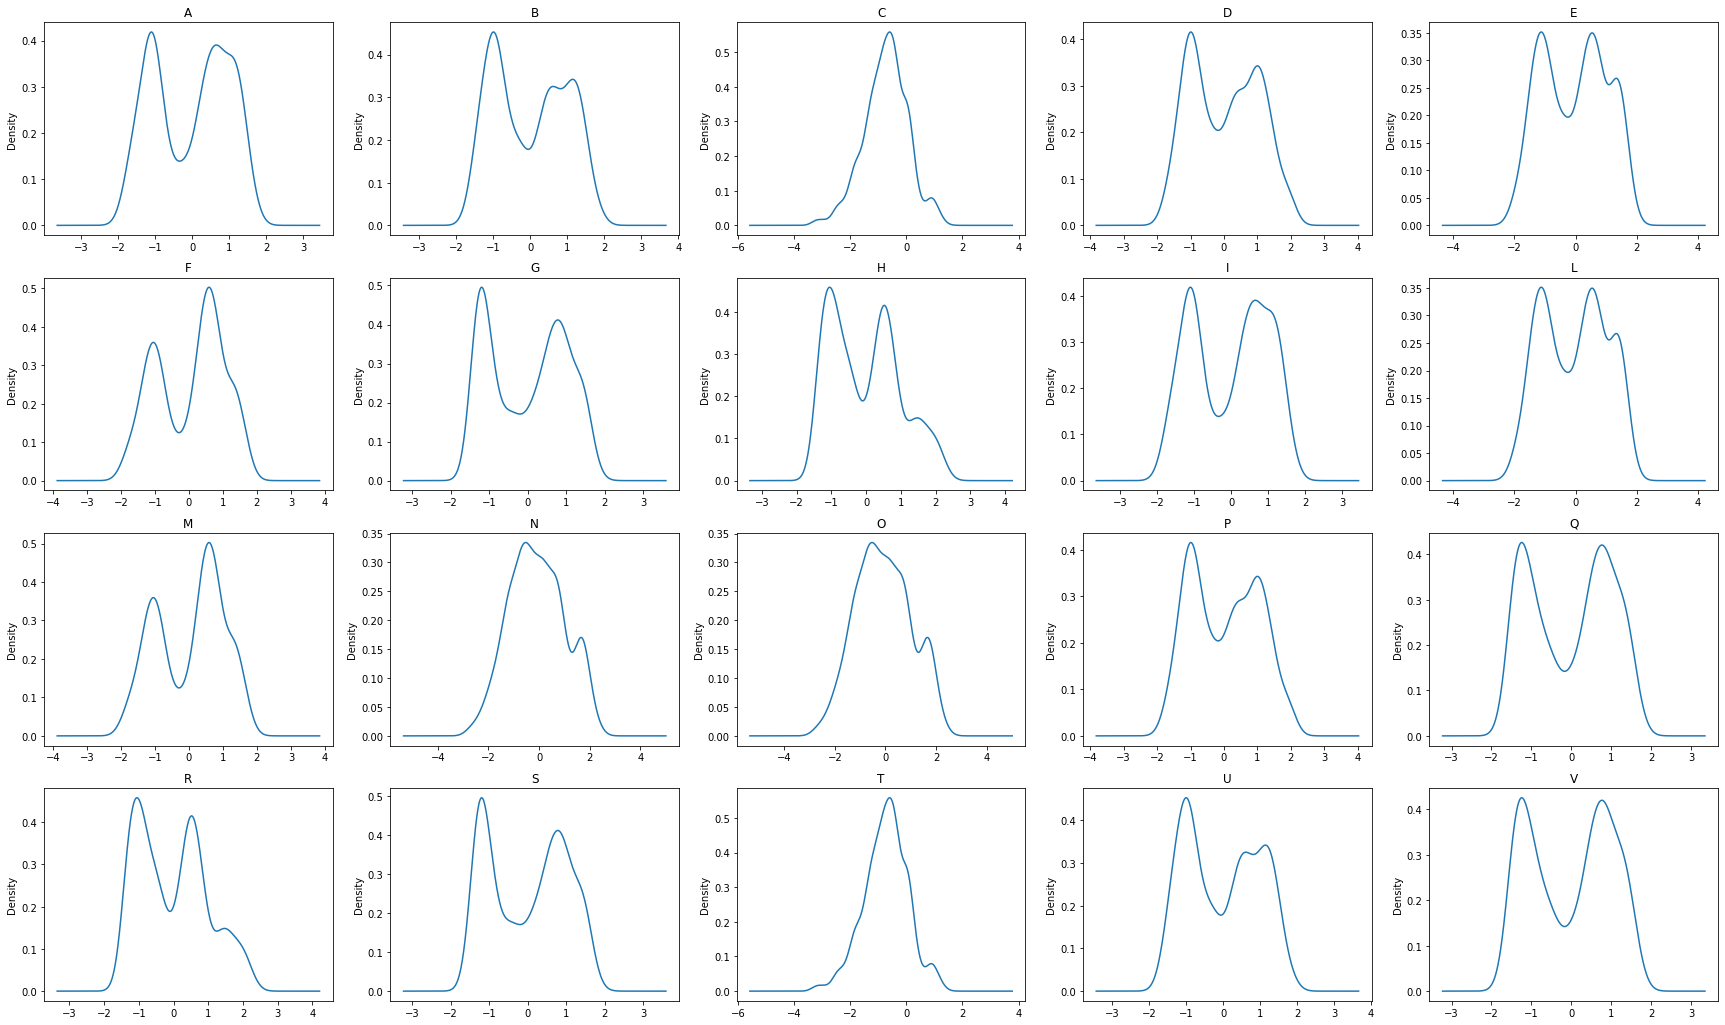

In [52]:
fig = plt.figure(figsize=(30, 18)) # any figure has 10x10 size
fig_dims = (4, 5) # 4 rows and 5 collums 
b = 17
plt.subplot2grid(fig_dims, (0, 0))
df['A'].plot(kind='kde')
plt.title('A')

plt.subplot2grid(fig_dims, (0, 1))
df['B'].plot(kind='kde')
plt.title('B')

plt.subplot2grid(fig_dims, (0, 2))
df['C'].plot(kind='kde')
plt.title('C')

plt.subplot2grid(fig_dims, (0, 3))
df['D'].plot(kind='kde')
plt.title('D')

plt.subplot2grid(fig_dims, (0, 4))
df['E'].plot(kind='kde')
plt.title('E')

plt.subplot2grid(fig_dims, (1, 0))
df['F'].plot(kind='kde')
plt.title('F')

plt.subplot2grid(fig_dims, (1, 1))
df['G'].plot(kind='kde')
plt.title('G')

plt.subplot2grid(fig_dims, (1, 2))
df['H'].plot(kind='kde')
plt.title('H')

plt.subplot2grid(fig_dims, (1, 3))
df['I'].plot(kind='kde')
plt.title('I')

plt.subplot2grid(fig_dims, (1, 4))
df['L'].plot(kind='kde')
plt.title('L')

plt.subplot2grid(fig_dims, (2, 0))
df['M'].plot(kind='kde')
plt.title('M')

plt.subplot2grid(fig_dims, (2, 1))
df['N'].plot(kind='kde')
plt.title('N')

plt.subplot2grid(fig_dims, (2, 2))
df['O'].plot(kind='kde')
plt.title('O')

plt.subplot2grid(fig_dims, (2, 3))
df['P'].plot(kind='kde')
plt.title('P')

plt.subplot2grid(fig_dims, (2, 4))
df['Q'].plot(kind='kde')
plt.title('Q')

plt.subplot2grid(fig_dims, (3, 0))
df['R'].plot(kind='kde')
plt.title('R')

plt.subplot2grid(fig_dims, (3, 1))
df['S'].plot(kind='kde')
plt.title('S')

plt.subplot2grid(fig_dims, (3, 2))
df['T'].plot(kind='kde')
plt.title('T')

plt.subplot2grid(fig_dims, (3, 3))
df['U'].plot(kind='kde')
plt.title('U')

plt.subplot2grid(fig_dims, (3, 4))
df['V'].plot(kind='kde')
plt.title('V')

plt.show()

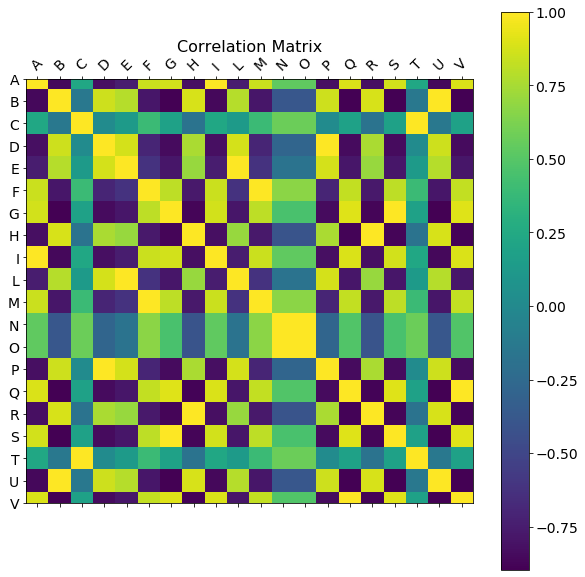

In [50]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Molte features sono strettamente correlate tra loro:
<ul>
    <li> D, P
    <li> E, L
    <li> N, O
    <li> V, Q
    <li> R, H
    <li> F, M
    <li> T, C
    <li> S, G
    <li> A, I
    <li> B, U
</ul>

In [28]:
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

I is highly correlated with A (ρ = 0.9999999999)	Rejected

L is highly correlated with E (ρ = 0.9999999999)	Rejected

M is highly correlated with F (ρ = 0.9999999999)	Rejected

O is highly correlated with N (ρ = 0.9999999999)	Rejected

P is highly correlated with D (ρ = 0.9999999999)	Rejected

Q is highly correlated with G (ρ = 0.9057754169)	Rejected

R is highly correlated with H (ρ = 0.9999999999)	Rejected

S is highly correlated with Q (ρ = 0.9057751686)	Rejected

T is highly correlated with C (ρ = 0.9999999998)	Rejected

U is highly correlated with B (ρ = 0.9999999999)	Rejected

V is highly correlated with S (ρ = 0.905775033)	Rejected
